# Atelier 4: Analyse en Composantes Principales
# ***

# AIT EL HAJ SAFAA GMP2 -----------TRAORE Koudadim Olivier IFA 2
# ***

# Bibliothèques

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()
import pandas as pd

# Chargement des données

In [4]:
df = pd.read_excel("C:/Users/asus/Desktop/Python/excel.PCA.xlsx", sheet_name=0,header=0,index_col=0)
df
#Autres descriptions du dataset
#df.head(), df.info(), df.describe(), df.tail(), df.columns, df.shape, df.shape[0], df.shape[1]


,Total Pop. Est. - Jul-1-2001,Net Domestic Mig.,Federal/Civilian move from abroad,Net Int. Migration,Period Births,Period Deaths,< 65 Pop. Est.,> 65 Pop. Est.
State,,,,,,,,
Alabama,4464356,-1.78,-0.02,0.69,14.41,10.28,869.21,130.79
Alaska,634892,-1.72,-0.24,2.09,15.95,4.64,941.95,58.05
Arizona,5307331,14.25,-0.03,4.29,15.88,7.77,869.54,130.46
Arkansas,2692090,0.36,-0.01,1.07,14.35,10.51,861.06,138.94
California,34501130,-2.01,-0.04,7.88,15.37,6.72,894.03,105.97
Colorado,4417714,9.32,-0.06,3.57,14.57,6.26,903.52,96.48
Connecticut,3425074,-2.37,-0.02,3.50,12.52,9.00,862.64,137.36
Delaware,796165,5.39,-0.04,2.12,14.01,8.79,869.45,130.55
District of Columbia,571822,-7.77,-0.07,5.73,14.33,10.76,880.75,119.25


# Préparation des données

In [72]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df)

#moyenne
#print(np.mean(Z,axis=0))

#écart-type
#print(np.std(Z,axis=0))


# Matrice de nuage

array([[<AxesSubplot:xlabel='Total Pop. Est. - Jul-1-2001', ylabel='Total Pop. Est. - Jul-1-2001'>,
        <AxesSubplot:xlabel='Net Domestic Mig.', ylabel='Total Pop. Est. - Jul-1-2001'>,
        <AxesSubplot:xlabel='Federal/Civilian move from abroad', ylabel='Total Pop. Est. - Jul-1-2001'>,
        <AxesSubplot:xlabel='Net Int. Migration', ylabel='Total Pop. Est. - Jul-1-2001'>,
        <AxesSubplot:xlabel='Period Births', ylabel='Total Pop. Est. - Jul-1-2001'>,
        <AxesSubplot:xlabel='Period Deaths', ylabel='Total Pop. Est. - Jul-1-2001'>,
        <AxesSubplot:xlabel='< 65 Pop. Est.', ylabel='Total Pop. Est. - Jul-1-2001'>,
        <AxesSubplot:xlabel='> 65 Pop. Est.', ylabel='Total Pop. Est. - Jul-1-2001'>],
       [<AxesSubplot:xlabel='Total Pop. Est. - Jul-1-2001', ylabel='Net Domestic Mig.'>,
        <AxesSubplot:xlabel='Net Domestic Mig.', ylabel='Net Domestic Mig.'>,
        <AxesSubplot:xlabel='Federal/Civilian move from abroad', ylabel='Net Domestic Mig.'>,
        <Axe

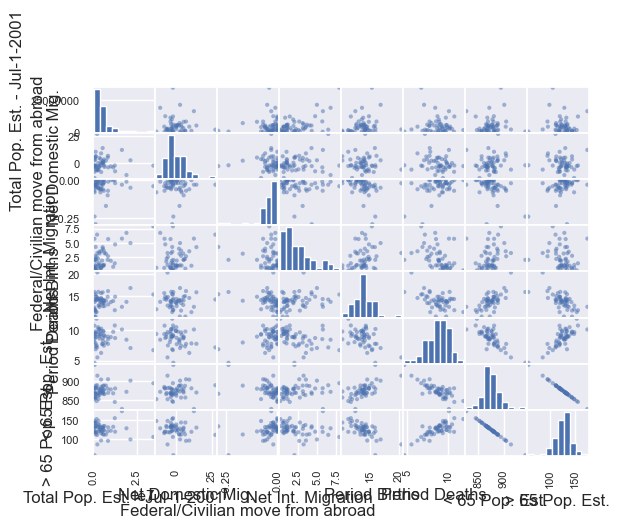

In [73]:
pd.plotting.scatter_matrix(df)

# ACP

In [74]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

8


# Variances

In [75]:
#variance expliquée
print(acp.explained_variance_)

[3.68275108e+00 1.56559163e+00 1.11155273e+00 7.94363630e-01
 4.61944966e-01 3.43360210e-01 2.00435760e-01 1.18403256e-30]


# On remarque que la plus grande quantité des informations est représenté par la première composante, car il posséde la variance expliquée la plus grande ( = 3.68275108e)

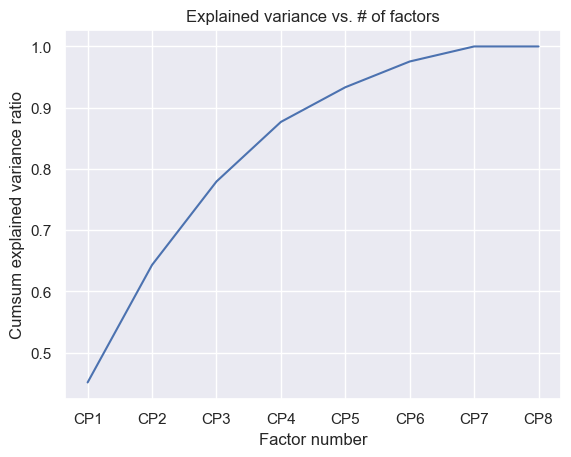

array([4.51317535e-01, 1.91861719e-01, 1.36219697e-01, 9.73484840e-02,
       5.66109027e-02, 4.20784571e-02, 2.45632058e-02, 1.45102029e-31])

In [77]:
#cumul de variance expliquée
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]
plt.plot(list_acp,np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
acp.explained_variance_ratio_

# On peut remplacer les 5 composantes par les deux premiers CP1 et CP2 .(partie linéaire).En continuant à ajouter des composantes principales, la quantité de variance expliquée continue à augmenter, mais à un taux décroissant. Cela signifie que chaque composante principale supplémentaire explique une quantité de variance de plus en plus petite dans les données. L'objectif est de choisir un nombre de composantes principales qui expliquent suffisamment de variance pour capturer les principales informations contenues dans les données, tout en évitant  le surajustement des résultats. Dans ce cas, il peut être raisonnable de considérer les deux  premières composantes principales pour une analyse plus approfondie.

# Individus

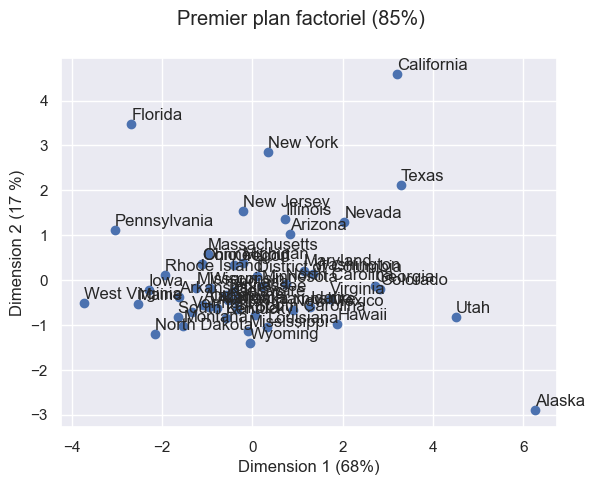

In [78]:
# plotting scatter plot
plt.scatter(coord[:,0],coord[:,1])
  
# Loop for annotation of all points
for i in range(len(coord)):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1] + 0.1))
plt.xlabel("Dimension 1 (68%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (17 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (85%)") # titre général
plt.show()

### Les deux axes CP1 et CP2 sont perpendiculaires et s'interceptent au point (0,0). Plus un individu est plus proche de l'un de ces axes et plu il est éloigné ddu centre, plus ce individu participe de manière significative à la formation de cet axe. Moins il est proche d'un axe et éloigné du centre, moins il a de l'influence sur l'orientation de l'axe. Les individus regroupés autour du centre ont moins d'effet quant au sens des axes principaux.

In [79]:
#contributions aux axes
eigval = (18-1)/18*acp.explained_variance_

ctr = coord**2
for j in range(8):
    ctr[:,j] = ctr[:,j]/(18*eigval[j])

df_ctr_cp1cp2 = pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df_ctr_cp1cp2

,id,CTR_1,CTR_2
0,Alabama,0.019056,0.011423
1,Alaska,0.623872,0.317878
2,Arizona,0.010880,0.038923
3,Arkansas,0.042197,0.005421
4,California,0.163766,0.789477
5,Colorado,0.127517,0.001453
6,Connecticut,0.019809,0.004656
7,Delaware,0.002154,0.007242
8,District of Columbia,0.000146,0.000303
9,Florida,0.114588,0.453692


### L'Alaska apporte la plus grande contribution (0.623872) à l'orientation de CP1, tandis que celle de CP2 est déterminée en grande partie par Califormia (contribution: 0.789477).

In [80]:
#qualité de représentation des individus - COS2
di = np.sum(Z**2,axis=1)
cos2 = coord**2
for j in range(8):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_12 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
df_ctr_12

,id,COS2_1,COS2_2
0,Alabama,0.423230,0.107850
1,Alaska,0.771398,0.167090
2,Arizona,0.095036,0.144541
3,Arkansas,0.648468,0.035415
4,California,0.291954,0.598325
5,Colorado,0.761327,0.003688
6,Connecticut,0.550071,0.054962
7,Delaware,0.096502,0.137939
8,District of Columbia,0.001199,0.001056
9,Florida,0.286890,0.482886


### Plus la qualité de représentation d'un individu par rapport à un axe est grande, plus celui-ci est mieux représenté par cet axe: West Virginia avec une qualité de 0.950860 pouur l'axe CP1 est le mieux représenté par cet axe parmi tout les individus; New York (qualité pour CP2 = 0.635259) est l'individu le mieux représenté par CP2 de tous les individus étudiés.

# Variables

In [81]:
acp.explained_variance_

array([3.68275108e+00, 1.56559163e+00, 1.11155273e+00, 7.94363630e-01,
       4.61944966e-01, 3.43360210e-01, 2.00435760e-01, 1.18403256e-30])

In [82]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((8,8))
for k in range(8):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                                  id     COR_1     COR_2
0       Total Pop. Est. - Jul-1-2001  0.206565  0.837120
1                  Net Domestic Mig.  0.152141  0.181207
2  Federal/Civilian move from abroad -0.515882  0.323448
3                 Net Int. Migration  0.445924  0.747032
4                      Period Births  0.739055  0.007782
5                      Period Deaths -0.863899  0.004116
6                     < 65 Pop. Est.  0.909624 -0.202800
7                     > 65 Pop. Est. -0.909624  0.202800


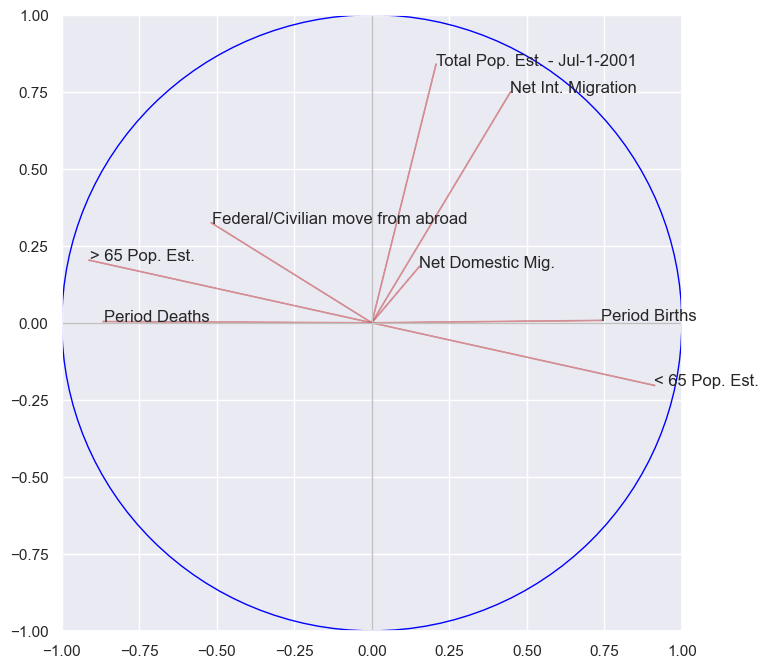

In [83]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(8):
    plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

for i in range(len(corvar)):
    plt.arrow(0, 0, corvar[i,0], corvar[i,1],color='r',alpha=0.5)
        
#affichage
plt.show()

### 2 variables avec un fort Coefficient de corrélation négatif.
### 2 variables indépendantes ont un Coefficient de corrélation nul
### 2 variables proches forment un angle aigu.
## Dans notre cas:
### On remarque que (<65 Pop.Est. et > 65 Pop.Est) et (Period Deaths et Period Births) sont négativement corrélés.
### Total Pop.Est est fortement correlé avec l'axe 2 
### Period Deaths et Period Births sont fortement correlé avec l'axe 1
### <65 Pop.Est et >65 Pop.Est sont fortement correlé avec l'axe 1 
### La variable la moins corrélée avec chacun des deux axes est Net Domestic Mig.
## Tous ces résultats du cercle des corrélations sont confirmés par les corrélations algébriques calculées.

# Biplot

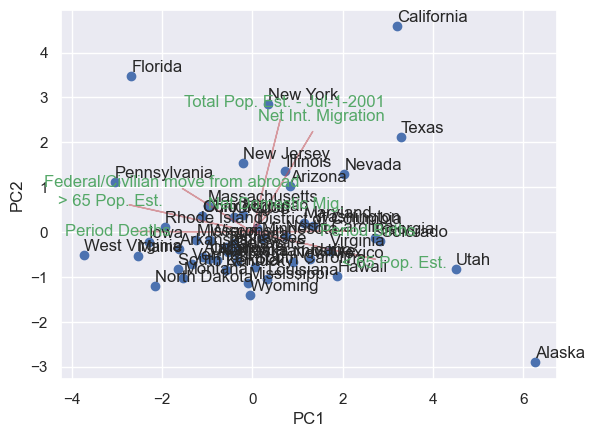

In [84]:
# coding: utf-8
 
def biplot(score,coeff,labels,indlab):
    xs = score[:,0]
    ys = score[:,1]
    n=coeff.shape[0]
    coeff2=corvar*3
    plt.scatter(xs,ys)
    
    for i in range(len(indlab)):
        plt.annotate(indlab[i],(xs[i],ys[i] + 0.1))
        
    for i in range(n):
        plt.arrow(0, 0, coeff2[i,0], coeff2[i,1],color='r',alpha=0.5)
        plt.text(coeff2[i,0]* 1.15, coeff2[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
 
# test
components=[0,1]
biplot(coord[:,0:2],np.transpose(acp.components_[components, :]),df.columns,df.index)
plt.show()